In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('scores_em.csv')

In [4]:
df

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76
5,6,48,60
6,7,65,81
7,8,49,66
8,9,65,78
9,10,58,82


### 1차원 데이터에 대한 도수분포표 및 간단한 시각화 정리

In [5]:
df_en=df['english']

### 도수분포표, 히스토그램

- frequency distribution 
- 데이터에 대해서 구간을 나누고 ( 정할 수 있다. ) 각 구간에 데이터가 몇 개 있는지 카운팅
- 성적이라고 한다면 성적에 대한 구간, 0~10, 10~20 .... 90~100 / 원하는 구간을 나눌 수 있다.
- 0~10 구간을 만들면 구간이 계급, class 학생 수 frequency 각 구간의 폭 (0~10점 10점의 폭)

In [6]:
freq, _ = np.histogram(df_en, bins=10, range=(0,100))

In [7]:
freq #학생 수 

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [8]:
_ # 범위 계급

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [9]:
# 데이터프레임으로 만들기
freq_class = [f'{i}-{i+10}' for i in range(0,100,10)]
# 데이터프레임 만들기
freq_df = pd.DataFrame({'frequency':freq},
                      index = pd.Index(freq_class,name='class'))

In [10]:
freq_df

,frequency
class,
0-10,0
10-20,0
20-30,0
30-40,2
40-50,8
50-60,16
60-70,18
70-80,6
80-90,0


- 이런한 구간을 단순하게 도수분포표로 생각할 수 있지만, 새로운 파생변수를 만드는 경우도 도움이 될 수 있다.
- 어떤 학생에 대한 변수를 만들 때, 높은 친구들에 대해서는 어떤 새로운 파생변수도 만들 수 있다.

# 필수과제 1
- 상대도수, 누적도수 
- 상대도수는 무엇이고, 누적도수는 무엇인지 리서치해 주시고, 코드로 구현해 주세요!
- 위의 데이터를 가지고 구현 부탁드립니다.

- 히스토그램
- 도수분포표의 막대그래프
- 히스토그램 데이터의 분포를 볼 때 사용, 데이터 분석에서 필수적으로 데이터의 분포를 파악할 때 한 번은 꼭 사용한다.
- matplot 

In [11]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'students')

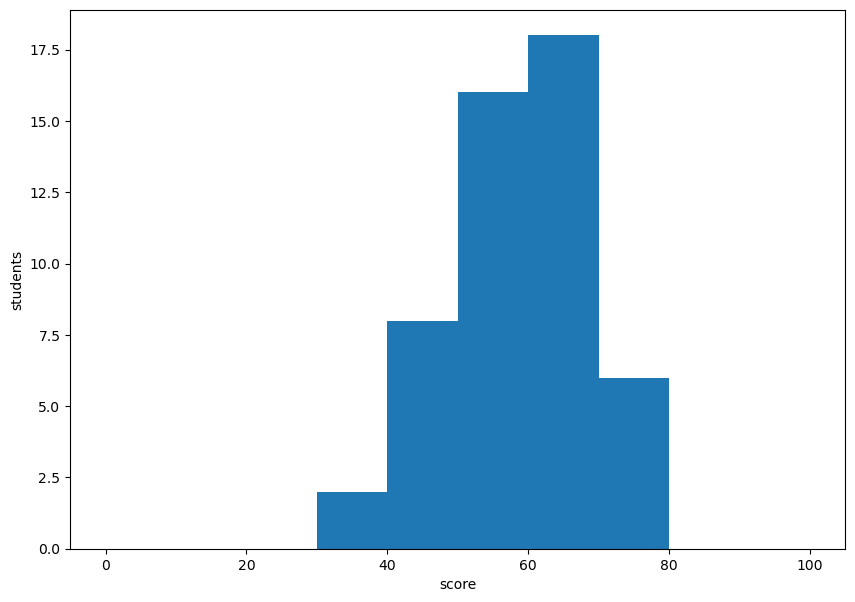

In [12]:
fig = plt.figure(figsize=(10,7)) #도화지 그리기

ax = fig.add_subplot(111)
freq, _ ,_ = ax.hist(df['english'], bins=10, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('students')


Text(0, 0.5, 'students')

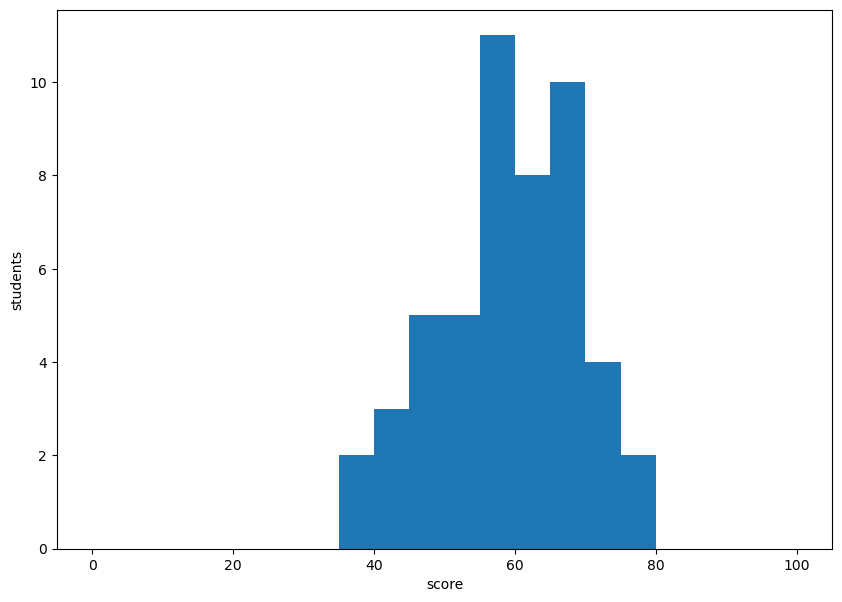

In [13]:
fig = plt.figure(figsize=(10,7)) #도화지 그리기

ax = fig.add_subplot(111)
freq, _ ,_ = ax.hist(df['english'], bins=20, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('students')

## boxplot

- 데이터의 이상치를 판단할 수 있다.
- IQR의 범위

{'whiskers': [<matplotlib.lines.Line2D at 0x1c7d1174790>,
 'caps': [<matplotlib.lines.Line2D at 0x1c7d1174d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c7d11744c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c7d1403340>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c7d1403610>],
 'means': []}

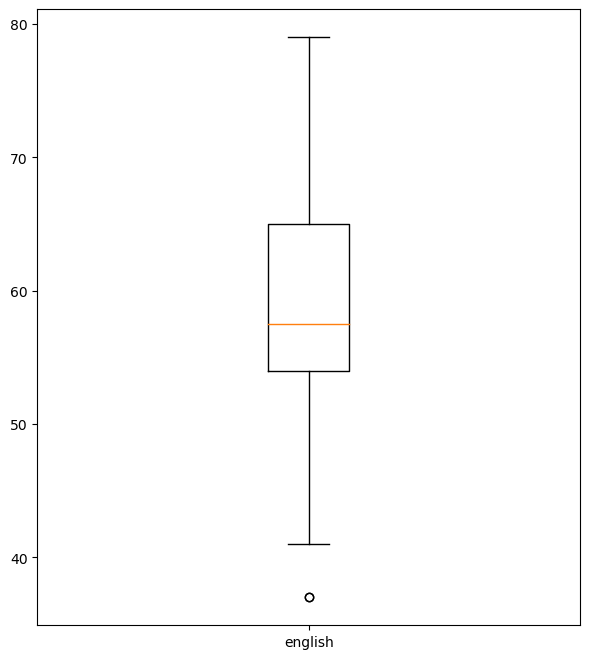

In [14]:
fig =plt.figure(figsize=(7,8))
ax = fig.add_subplot(111)
ax.boxplot(df['english'], labels=['english'])

- IQR봐서 이상치나오면 그거 다 제거하고 분석하면 되지?
- 정말 위험한 발상입니다. 통계적으로 이상치를 보여주는 것이지, 도메인 기반으로 이상치를 보여주는 건 아니다.
- 따라서 분석가는 이상치에 대한 판단을 할 순 있지만 단순 IQR, boxplot을 이용한 시각화로 이상치를 제거하려는 것은 안 됩니다.

# 2차원 데이터를 확인

In [15]:
en_score = np.array(df['english'][:10])
mt_score = np.array(df['mathematics'][:10])


#데이터프레임 다시 만들기 
st_df = pd.DataFrame({'eng':en_score,
                     'math':mt_score},
                    index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))

In [16]:
st_df

,eng,math
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


- 1차원과 비교했을 때 2차원을 비교한다는 것은
- 결국 두 개의 컬럼을 사용한다는 것이고, 대부분 두 개의 컬럼을 사용한다는 것은 두 개의 컬럼에 대한 데이터의 분포 또는 영향도를 확인할 수 있다.
- 1차원인 경우는 카운팅의 개념으로 분포를 확인했다면, 2차원은 두 개의 데이터이기 때문에 확인할 수 있는 것이 더 많다.
- 상관계수, 공분산 두 변수간의 관계를 확인하게 되는 것

- 영어점수가 높으면 수학점수도 높다?
- 영어점수가 높으면 수학점수는 낮다?
- 두 데이터에 대한 관계를 살펴볼 수 있다.

- 상관성에 대해서 확인을 하고, 양의 상관, 음의 상관이다 

# 공분산

- 두 데이터에 대한 분포를 보고나서 
- 두 데이터가 어떤 상관성이 있는지 보는데
- 공분산은 결국 면적의 개념이다. 
- 영어점수와 수학점수에 대한 평균을 기반 선을 가지고 데이터 대한 비교를 해본다 하면
- 공분산이 양의 값이면 면적이 양의 값이라는 것이고 
- 공분산이 음의 값이면 면적이 음의 값이라는 것

In [17]:
(df['english'].mean())

58.38

In [18]:
(df['mathematics'].mean())

78.88

Text(0, 0.5, 'math')

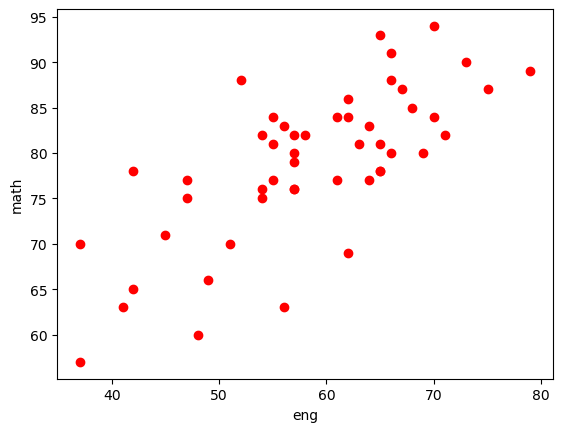

In [19]:
plt.scatter(df['english'],df['mathematics'], c='red')
plt.xlabel('eng')
plt.ylabel('math')

Text(0, 0.5, 'math')

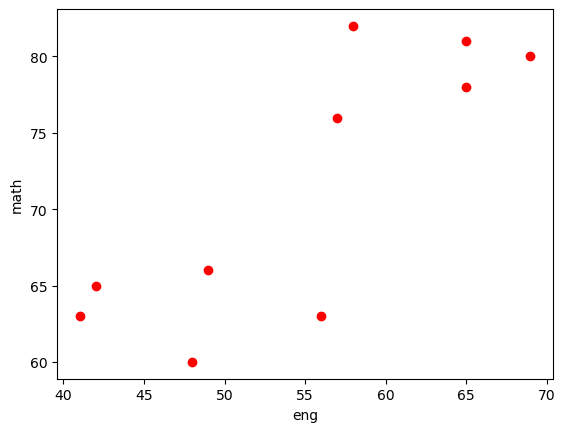

In [20]:
plt.scatter(st_df['eng'],st_df['math'], c='red')
plt.xlabel('eng')
plt.ylabel('math')

In [21]:
st_df_new=st_df.copy()


In [22]:
st_df_new['eng_dev'] = st_df_new['eng'] - st_df_new['eng'].mean()
st_df_new['math_dev'] = st_df_new['math'] - st_df_new['math'].mean()

#공분산이라는 건 면적의 
st_df_new['cov'] = st_df_new['eng_dev']*st_df_new['math_dev']

In [23]:
st_df_new.mean() #전체적으로 양의 값나왔다.

eng         5.500000e+01
math        7.140000e+01
eng_dev     0.000000e+00
math_dev   -5.684342e-15
cov         6.280000e+01
dtype: float64

- 넘파이로 아주 쉽게 공분산을 구할 수 있다.

In [24]:
cov_mat = np.cov(st_df_new['eng'],st_df_new['math'],ddof=0)

In [25]:
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

        - 영어, 수학
- 영어     86   62.8
- 수학     62.8 68.44

## 필수과제2 
- 공분산의 수식을 확인해 보고 그것에 대한 개념을 꼭 정리해서 같이 과제 제출해 주세요!

## 상관계수로 본다.
- 상관계수로 변수에 대한 상관성을 체크한다.
- 상관계수로 보는 이유?
- 수학, 영어라는 동일한 변수에 대해서 공분산을 체크한 것
- 영어점수와 통장잔고 완전 다른 개념이다. 이 두개를 같이 비교하면, 영어점수가 90, 통장잔고는 1,000원 작다
- 단위가 달라지니 공분산을 계산해도 이해하기 어려운 경우 
- 단위에 의존하지 않고 상관으 나타내는 지표를 만드는 것이 상관계수 
- 상관계수는 -1 ~ +1 범위에 존재하는데 -에 가까우면 음의 상관관계, +1에 가까우면 양의 상관관계, 0이면 무상관

In [26]:
import seaborn as sns

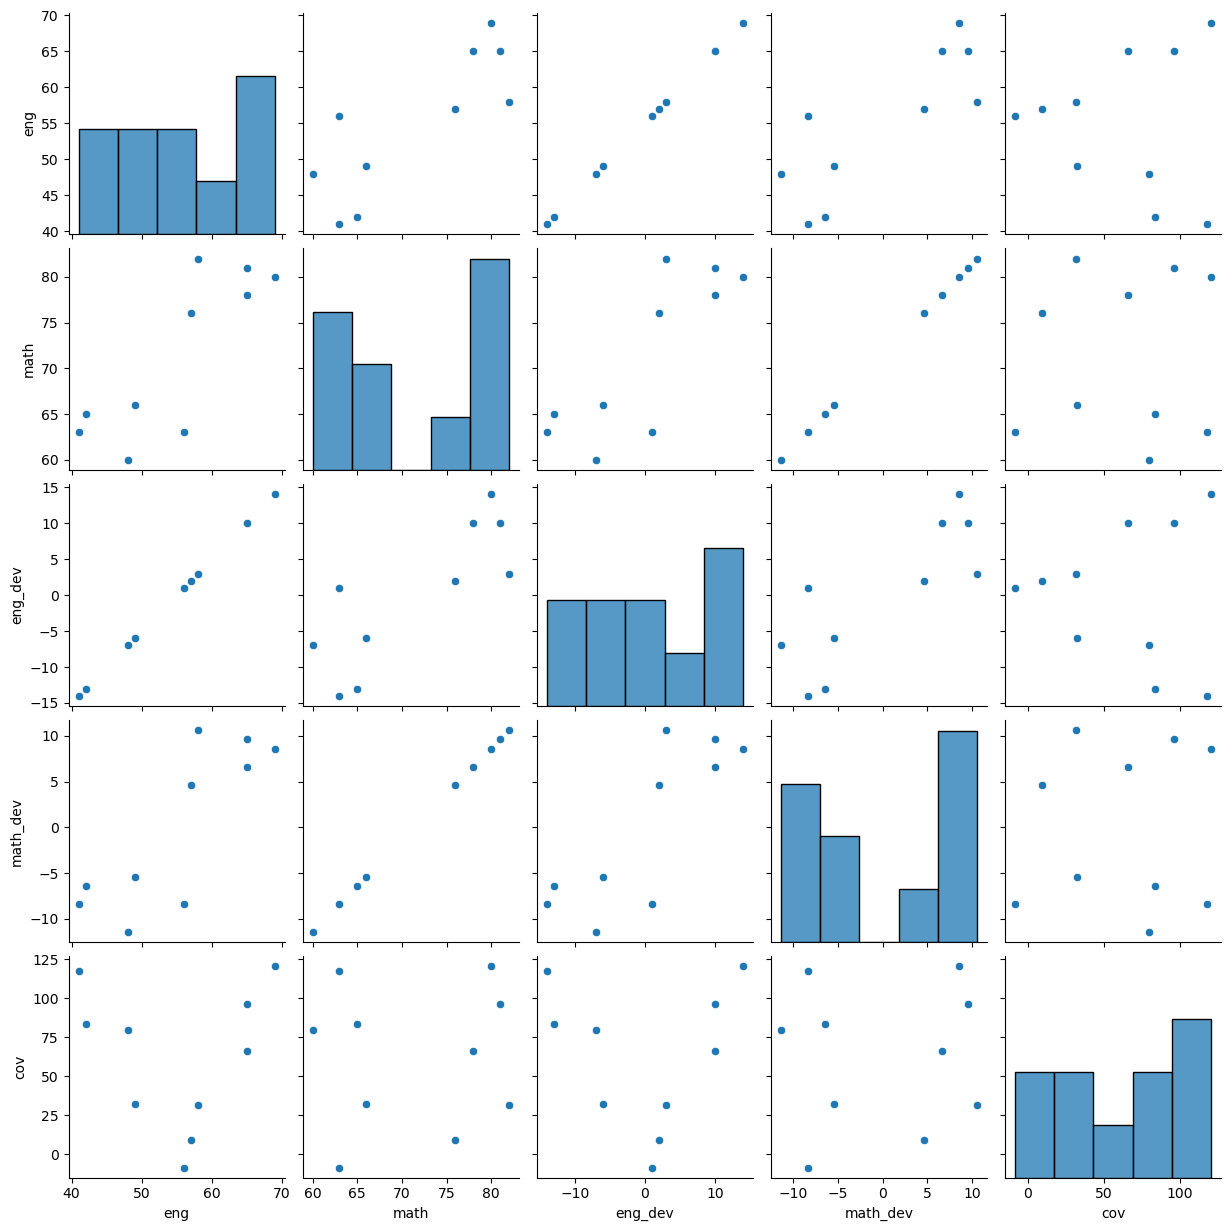

In [27]:
sns.pairplot(st_df_new)

- 상관계수를 구하기 전에 필수적으로 데이터의 시각화를 진행하여 데이터의 분포, 경향성을 확인해야 한다!

### 필수과제 3
- 상관계수 구하는 식을 확인하고 개념을 정리해서 같이 제출해 주세요!
- 쥬피터에 올리기 어려우면 직접 작성해서 pdf파일 또는 이미지로 정리해서 쥬피터에 업로드 해도 됩니다!

In [28]:
# 영어, 수학 상관계수 구하기
np.cov(st_df_new['eng'], st_df_new['math'],ddof=0)[0,1]/(np.std(st_df_new['eng']*np.std(st_df_new['math'])))

0.8185692341186714

In [29]:
## 넘파이로 쉽게 구할 수 있따
np.corrcoef(st_df_new['eng'],st_df_new['math'])

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [30]:
#데이터프레임으로 상관계수 만들기
st_df_new.corr()

,eng,math,eng_dev,math_dev,cov
eng,1.000000,0.818569,1.000000,0.818569,-0.017808
math,0.818569,1.000000,0.818569,1.000000,0.067759
eng_dev,1.000000,0.818569,1.000000,0.818569,-0.017808
math_dev,0.818569,1.000000,0.818569,1.000000,0.067759
cov,-0.017808,0.067759,-0.017808,0.067759,1.000000


In [31]:
#데이터프레임으로 상관계수 만들기
df.corr() #0.72 차이

,student number,english,mathematics
student number,1.000000,0.071501,0.289502
english,0.071501,1.000000,0.723741
mathematics,0.289502,0.723741,1.000000


In [32]:
st_df_new

,eng,math,eng_dev,math_dev,cov
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [33]:
df

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76
5,6,48,60
6,7,65,81
7,8,49,66
8,9,65,78
9,10,58,82


- 무작정 0.6이다 상관성 높다, 0.7 상관성 미쳤다. 
- 0.8 높다
- 하나의 비교지표, 기준에대한 선을 제공하는 것이지 정답은 아니다.
- 0.3 0.4 , 도메인에 따라 달라질 수 있는 것이라
- 맹신하면 안 된다.

- 상관계수가 결국엔 데이터에 대한 이해를 바탕으로 더 나아가는 출발점
- 따라서 이걸 잘 이해하고 있어야지 머신러닝, 딥러닝 추가적인 엔지니어링에도 도움이 된다.

- 다중회귀분석 진행시 다중공선성 체크해야 된다. 
- 변수들의 상관성부터 출발한다.

Text(0, 0.5, 'math')

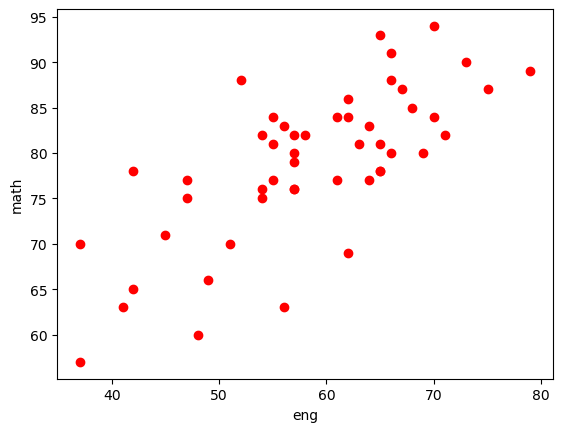

In [34]:
# 산점도
plt.scatter(df['english'],df['mathematics'], c='red')
plt.xlabel('eng')
plt.ylabel('math')

### 필수과제 4.
- 예시 데이터를 가지고 실제 상관성 등을 분석해서
- 각 변수들의 특징과, 두 변수간의 관계 등을 비교해서 데이터 시각화에 대한 해석을 주석처리 해주세요!